**Chapter 2 – End-to-end Project Simplified**

*I took the exercises from Ch. 2 and removed some steps such as *
* income stratification, imputer transform and ocean proximity transform*

# Setup

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [6]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import pandas as pd
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Get the data

In [51]:
housing_all = pd.read_csv('datasets/housing/housing.csv')
housing = housing_all.reset_index()  # this adds an index column
housing = housing.drop('ocean_proximity', axis=1)
housing = housing.drop('total_bedrooms',axis=1)
housing.head()

,index,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value
0,0,-122.23,37.88,41.0,880.0,322.0,126.0,8.3252,452600.0
1,1,-122.22,37.86,21.0,7099.0,2401.0,1138.0,8.3014,358500.0
2,2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0
3,3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0
4,4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0


In [52]:
housing_tmp = housing[ housing["median_house_value"] < 499000 ]
housing = housing_tmp
housing.describe()

,index,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value
count,19646.000000,19646.000000,19646.000000,19646.000000,19646.000000,19646.000000,19646.000000,19646.000000,19646.000000
mean,10282.443754,-119.562336,35.651866,28.373613,2620.254810,1441.400641,501.192202,3.676025,192024.075944
std,5988.176389,2.005734,2.150064,12.504467,2182.421161,1144.117488,383.403858,1.570201,97066.381373
min,0.000000,-124.350000,32.540000,1.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,5036.250000,-121.760000,33.930000,18.000000,1438.000000,796.250000,282.000000,2.526300,116425.000000
50%,10318.500000,-118.500000,34.270000,28.000000,2111.000000,1179.000000,411.000000,3.449000,173600.000000
75%,15382.750000,-117.990000,37.730000,37.000000,3120.750000,1746.750000,606.000000,4.581475,247900.000000
max,20639.000000,-114.310000,41.950000,52.000000,39320.000000,35682.000000,6082.000000,15.000100,498800.000000


In [55]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
# split data here to avoid "snooping bias" and over-fitting when looking at data
# and creating a model to fit the data

# Discover and visualize the data to gain insights

Saving figure better_visualization_plot


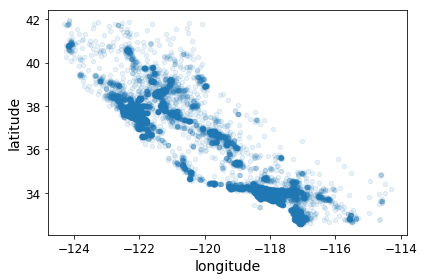

In [56]:
train_set.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
save_fig("better_visualization_plot")

In [57]:
corr_matrix = train_set.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.648203
total_rooms           0.146018
households            0.097226
index                 0.072239
housing_median_age    0.065054
population            0.014440
longitude            -0.046005
latitude             -0.149891
Name: median_house_value, dtype: float64

Saving figure scatter_matrix_plot


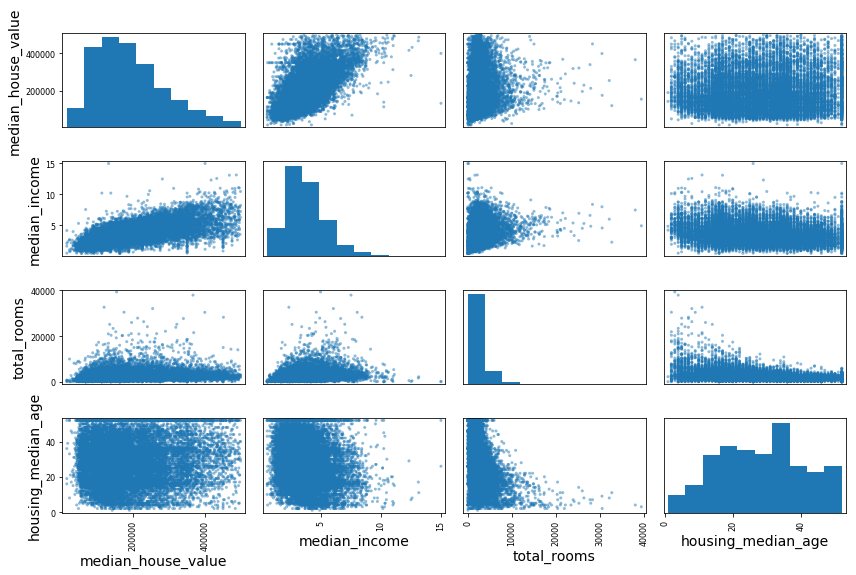

In [58]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(train_set[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

# Prepare the data for Machine Learning algorithms

In [74]:
housing_features = train_set.drop('median_house_value',axis=1)
housing_labels = train_set['median_house_value']
housing_labels.head(2),housing_features.head()

(9856     347700.0
 15255    278300.0
 Name: median_house_value, dtype: float64,
        index  longitude  latitude  housing_median_age  total_rooms  \
 9856    9856    -121.86     36.58                20.0       6332.0   
 15255  15255    -117.26     33.04                18.0       2229.0   
 8442    8442    -118.36     33.90                42.0       1935.0   
 745      745    -122.09     37.67                33.0       2431.0   
 9329    9329    -122.47     37.95                16.0       3769.0   
 
        population  households  median_income  
 9856       2668.0       955.0         5.7578  
 15255      1088.0       352.0         6.3525  
 8442       1136.0       379.0         4.7400  
 745        1854.0       603.0         2.7019  
 9329       1986.0       815.0         3.9712  )

# Train & Test Linear Model

In [62]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_features, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [63]:
housing.shape

(19646, 9)

In [79]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

housing_predictions = lin_reg.predict(housing_features)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae, lin_rmse

(45769.694803255894, 61351.024235575795)

In [70]:
test_features = test_set.drop('median_house_value',axis=1)
test_labels = test_set['median_house_value']
test_labels.shape

(3930,)

In [80]:
housing_predictions = lin_reg.predict(test_features)
lin_mse = mean_squared_error(test_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_mae = mean_absolute_error(test_labels, housing_predictions)
lin_mae, lin_rmse

(46519.92663220125, 62053.63059408647)

In [91]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())


In [89]:
lin_scores = cross_val_score(lin_reg, housing_features, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [63205.70000633 60044.6800119  61067.52018964 61741.77995181
 62302.61655695 63294.48470468 60724.12997644 59103.46265937
 59317.97700468 63779.64730807]
Mean: 61458.19983698585
Standard deviation: 1594.4636398222315


# Train & Test Tree Regression Model

In [75]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_features, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [76]:
housing_predictions = tree_reg.predict(housing_features)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [81]:
housing_predictions = tree_reg.predict(test_features)
lin_mse = mean_squared_error(test_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_mae = mean_absolute_error(test_labels, housing_predictions)
lin_mae, lin_rmse

(40054.12213740458, 60571.040641354266)

In [83]:
feature = tree_reg.feature_importances_
sorted(zip(feature, attributes), reverse=True)

[(0.16515244680256566, 'median_income'),
 (0.15004853284155814, 'total_rooms'),
 (0.10109635321048226, 'median_house_value'),
 (0.055845672128580756, 'housing_median_age')]

In [92]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_features, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)
# performing 10 fold cross-validation to ensure statistical robustness

Scores: [63738.17910462 59070.59809919 61468.47187259 59539.66441309
 63793.51756215 65162.72940931 57646.43016049 62604.52983573
 60332.27894649 62240.14903688]
Mean: 61559.6548440546
Standard deviation: 2266.648432979506


# Random Forest Model

In [94]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(housing_features, housing_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [96]:
housing_predictions = forest_reg.predict(housing_features)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

19134.342693045404

In [97]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_features, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [45590.35101824 46026.53155478 46786.28711447 44586.10209085
 47251.89572516 44629.00756102 44429.23586006 44569.23013652
 45081.24157654 46120.87794848]
Mean: 45507.07605861151
Standard deviation: 957.9209202571384


# Fine-tune RandomForest Model

In [103]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [100, 300, 600], 'max_features': [4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
   # {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_features, housing_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [100, 300, 600], 'max_features': [4, 6, 8]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

The best hyperparameter combination found:

In [104]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 600}

In [105]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=4, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=600, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

Let's look at the score of each hyperparameter combination tested during the grid search:

In [106]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

42380.551340255624 {'max_features': 4, 'n_estimators': 100}
42199.418681251904 {'max_features': 4, 'n_estimators': 300}
42160.39072098049 {'max_features': 4, 'n_estimators': 600}
42552.58368247785 {'max_features': 6, 'n_estimators': 100}
42471.13814439287 {'max_features': 6, 'n_estimators': 300}
42415.74137548903 {'max_features': 6, 'n_estimators': 600}
43416.97497021564 {'max_features': 8, 'n_estimators': 100}
43235.17647294158 {'max_features': 8, 'n_estimators': 300}
43182.66031888863 {'max_features': 8, 'n_estimators': 600}


In [107]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.750070,0.127130,0.076995,0.009450,4,100,"{'max_features': 4, 'n_estimators': 100}",-1.766583e+09,-1.885315e+09,-1.819195e+09,...,-1.796111e+09,5.922196e+07,3,-2.596933e+08,-2.516893e+08,-2.526715e+08,-2.567439e+08,-2.553073e+08,-2.552211e+08,2.874070e+06
1,10.858694,0.119215,0.211887,0.007800,4,300,"{'max_features': 4, 'n_estimators': 300}",-1.749226e+09,-1.867415e+09,-1.817279e+09,...,-1.780791e+09,5.904156e+07,2,-2.474119e+08,-2.420706e+08,-2.456281e+08,-2.482775e+08,-2.466576e+08,-2.460091e+08,2.153649e+06
2,21.952395,0.328521,0.460103,0.020700,4,600,"{'max_features': 4, 'n_estimators': 600}",-1.758571e+09,-1.863287e+09,-1.805096e+09,...,-1.777499e+09,5.645560e+07,1,-2.459312e+08,-2.401875e+08,-2.435429e+08,-2.468130e+08,-2.456868e+08,-2.444323e+08,2.378980e+06
3,5.259935,0.233534,0.073523,0.009162,6,100,"{'max_features': 6, 'n_estimators': 100}",-1.823825e+09,-1.872087e+09,-1.831278e+09,...,-1.810722e+09,5.026007e+07,6,-2.599167e+08,-2.560503e+08,-2.547961e+08,-2.575547e+08,-2.597627e+08,-2.576161e+08,2.015392e+06
4,15.616279,0.480313,0.221796,0.007493,6,300,"{'max_features': 6, 'n_estimators': 300}",-1.806344e+09,-1.861641e+09,-1.836992e+09,...,-1.803798e+09,5.176362e+07,5,-2.514572e+08,-2.468154e+08,-2.475299e+08,-2.510645e+08,-2.523262e+08,-2.498386e+08,2.226223e+06
5,31.718950,0.446531,0.460386,0.032248,6,600,"{'max_features': 6, 'n_estimators': 600}",-1.794524e+09,-1.863162e+09,-1.831309e+09,...,-1.799095e+09,5.085336e+07,4,-2.483436e+08,-2.443959e+08,-2.463267e+08,-2.496955e+08,-2.493913e+08,-2.476306e+08,2.001800e+06
6,6.443657,0.043241,0.070552,0.003978,8,100,"{'max_features': 8, 'n_estimators': 100}",-1.864485e+09,-1.947098e+09,-1.933755e+09,...,-1.885034e+09,5.095798e+07,9,-2.684424e+08,-2.638926e+08,-2.641180e+08,-2.668523e+08,-2.717105e+08,-2.670032e+08,2.906998e+06
7,20.597996,1.627235,0.225692,0.022177,8,300,"{'max_features': 8, 'n_estimators': 300}",-1.851748e+09,-1.926862e+09,-1.922096e+09,...,-1.869280e+09,5.193613e+07,8,-2.596286e+08,-2.556209e+08,-2.562560e+08,-2.597918e+08,-2.629134e+08,-2.588421e+08,2.651784e+06
8,40.220605,0.902183,0.470905,0.018649,8,600,"{'max_features': 8, 'n_estimators': 600}",-1.850207e+09,-1.923136e+09,-1.922969e+09,...,-1.864742e+09,5.320284e+07,7,-2.568914e+08,-2.536364e+08,-2.543127e+08,-2.586920e+08,-2.596633e+08,-2.566392e+08,2.360178e+06


In [109]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=100, high=600),
        'max_features': randint(low=2, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_features, housing_labels)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000022689568278>, 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000226895687B8>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

In [110]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

42204.05897511269 {'max_features': 5, 'n_estimators': 448}
42252.52867477659 {'max_features': 4, 'n_estimators': 171}
42483.45950988069 {'max_features': 6, 'n_estimators': 120}
42431.949011333774 {'max_features': 3, 'n_estimators': 566}
42151.25433061735 {'max_features': 4, 'n_estimators': 558}
42525.45478712322 {'max_features': 6, 'n_estimators': 199}
42206.37030210504 {'max_features': 4, 'n_estimators': 249}
42438.29965459778 {'max_features': 6, 'n_estimators': 357}
42214.61745320678 {'max_features': 5, 'n_estimators': 513}
42754.66670360301 {'max_features': 7, 'n_estimators': 485}


In [111]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.13473552, 0.15851795, 0.15594996, 0.04638539, 0.03572787,
       0.03604828, 0.03206942, 0.40056561])

In [ ]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

In [ ]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [ ]:
final_rmse

We can compute a 95% confidence interval for the test RMSE:

In [ ]:
from scipy import stats

In [ ]:
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
mean = squared_errors.mean()
m = len(squared_errors)

np.sqrt(stats.t.interval(confidence, m - 1,
                         loc=np.mean(squared_errors),
                         scale=stats.sem(squared_errors)))

We could compute the interval manually like this:

In [ ]:
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

Alternatively, we could use a z-scores rather than t-scores:

In [ ]:
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

# Extra material

## A full pipeline with both preparation and prediction

In [ ]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("linear", LinearRegression())
    ])

full_pipeline_with_predictor.fit(housing, housing_labels)
full_pipeline_with_predictor.predict(some_data)

## Model persistence using joblib

In [ ]:
my_model = full_pipeline_with_predictor

In [ ]:
from sklearn.externals import joblib
joblib.dump(my_model, "my_model.pkl") # DIFF
#...
my_model_loaded = joblib.load("my_model.pkl") # DIFF

## Example SciPy distributions for `RandomizedSearchCV`

In [ ]:
from scipy.stats import geom, expon
geom_distrib=geom(0.5).rvs(10000, random_state=42)
expon_distrib=expon(scale=1).rvs(10000, random_state=42)
plt.hist(geom_distrib, bins=50)
plt.show()
plt.hist(expon_distrib, bins=50)
plt.show()

# Exercise solutions

## 1.

Question: Try a Support Vector Machine regressor (`sklearn.svm.SVR`), with various hyperparameters such as `kernel="linear"` (with various values for the `C` hyperparameter) or `kernel="rbf"` (with various values for the `C` and `gamma` hyperparameters). Don't worry about what these hyperparameters mean for now. How does the best `SVR` predictor perform?

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
        {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
        {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
         'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]

svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=4)
grid_search.fit(housing_prepared, housing_labels)

The best model achieves the following score (evaluated using 5-fold cross validation):

In [ ]:
negative_mse = grid_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

That's much worse than the `RandomForestRegressor`. Let's check the best hyperparameters found:

In [ ]:
grid_search.best_params_

The linear kernel seems better than the RBF kernel. Notice that the value of `C` is the maximum tested value. When this happens you definitely want to launch the grid search again with higher values for `C` (removing the smallest values), because it is likely that higher values of `C` will be better.

## 2.

Question: Try replacing `GridSearchCV` with `RandomizedSearchCV`.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

# see https://docs.scipy.org/doc/scipy/reference/stats.html
# for `expon()` and `reciprocal()` documentation and more probability distribution functions.

# Note: gamma is ignored when kernel is "linear"
param_distribs = {
        'kernel': ['linear', 'rbf'],
        'C': reciprocal(20, 200000),
        'gamma': expon(scale=1.0),
    }

svm_reg = SVR()
rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs,
                                n_iter=50, cv=5, scoring='neg_mean_squared_error',
                                verbose=2, n_jobs=4, random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

The best model achieves the following score (evaluated using 5-fold cross validation):

In [ ]:
negative_mse = rnd_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

Now this is much closer to the performance of the `RandomForestRegressor` (but not quite there yet). Let's check the best hyperparameters found:

In [ ]:
rnd_search.best_params_

This time the search found a good set of hyperparameters for the RBF kernel. Randomized search tends to find better hyperparameters than grid search in the same amount of time.

Let's look at the exponential distribution we used, with `scale=1.0`. Note that some samples are much larger or smaller than 1.0, but when you look at the log of the distribution, you can see that most values are actually concentrated roughly in the range of exp(-2) to exp(+2), which is about 0.1 to 7.4.

In [ ]:
expon_distrib = expon(scale=1.)
samples = expon_distrib.rvs(10000, random_state=42)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Exponential distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()

The distribution we used for `C` looks quite different: the scale of the samples is picked from a uniform distribution within a given range, which is why the right graph, which represents the log of the samples, looks roughly constant. This distribution is useful when you don't have a clue of what the target scale is:

In [ ]:
reciprocal_distrib = reciprocal(20, 200000)
samples = reciprocal_distrib.rvs(10000, random_state=42)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Reciprocal distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()

The reciprocal distribution is useful when you have no idea what the scale of the hyperparameter should be (indeed, as you can see on the figure on the right, all scales are equally likely, within the given range), whereas the exponential distribution is best when you know (more or less) what the scale of the hyperparameter should be.

## 3.

Question: Try adding a transformer in the preparation pipeline to select only the most important attributes.

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]

Note: this feature selector assumes that you have already computed the feature importances somehow (for example using a `RandomForestRegressor`). You may be tempted to compute them directly in the `TopFeatureSelector`'s `fit()` method, however this would likely slow down grid/randomized search since the feature importances would have to be computed for every hyperparameter combination (unless you implement some sort of cache).

Let's define the number of top features we want to keep:

In [ ]:
k = 5

Now let's look for the indices of the top k features:

In [ ]:
top_k_feature_indices = indices_of_top_k(feature_importances, k)
top_k_feature_indices

In [ ]:
np.array(attributes)[top_k_feature_indices]

Let's double check that these are indeed the top k features:

In [ ]:
sorted(zip(feature_importances, attributes), reverse=True)[:k]

Looking good... Now let's create a new pipeline that runs the previously defined preparation pipeline, and adds top k feature selection:

In [ ]:
preparation_and_feature_selection_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k))
])

In [ ]:
housing_prepared_top_k_features = preparation_and_feature_selection_pipeline.fit_transform(housing)

Let's look at the features of the first 3 instances:

In [ ]:
housing_prepared_top_k_features[0:3]

Now let's double check that these are indeed the top k features:

In [ ]:
housing_prepared[0:3, top_k_feature_indices]

Works great!  :)

## 4.

Question: Try creating a single pipeline that does the full data preparation plus the final prediction.

In [ ]:
prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k)),
    ('svm_reg', SVR(**rnd_search.best_params_))
])

In [ ]:
prepare_select_and_predict_pipeline.fit(housing, housing_labels)

Let's try the full pipeline on a few instances:

In [ ]:
some_data = housing.iloc[:4]
some_labels = housing_labels.iloc[:4]

print("Predictions:\t", prepare_select_and_predict_pipeline.predict(some_data))
print("Labels:\t\t", list(some_labels))

Well, the full pipeline seems to work fine. Of course, the predictions are not fantastic: they would be better if we used the best `RandomForestRegressor` that we found earlier, rather than the best `SVR`.

## 5.

Question: Automatically explore some preparation options using `GridSearchCV`.

In [ ]:
param_grid = [
        {'preparation__num__imputer__strategy': ['mean', 'median', 'most_frequent'],
         'feature_selection__k': list(range(1, len(feature_importances) + 1))}
]

grid_search_prep = GridSearchCV(prepare_select_and_predict_pipeline, param_grid, cv=5,
                                scoring='neg_mean_squared_error', verbose=2, n_jobs=4)
grid_search_prep.fit(housing, housing_labels)

In [ ]:
grid_search_prep.best_params_

The best imputer strategy is `most_frequent` and apparently almost all features are useful (15 out of 16). The last one (`ISLAND`) seems to just add some noise.

Congratulations! You already know quite a lot about Machine Learning. :)